# Градиентный бустинг (Gradient Boosting)

## 1. Композиции простых алгоритмов

### 1.1 Недостатки случайного леса

**Случайный лес** - композиция глубоких деревьев, которые строятся независимо друг от друга. Но такой подход имеет следующую проблему. Обучение глубоких деревьев требует очень много вычислительных ресурсов, особенно в случае большой выборки или большого числа признаков.

Если ограничить глубину решающих деревьев в случайном лесе, то они уже не смогут улавливать сложные закономерности в данных. Это приведет к тому, что сдвиг будет слишком большим.

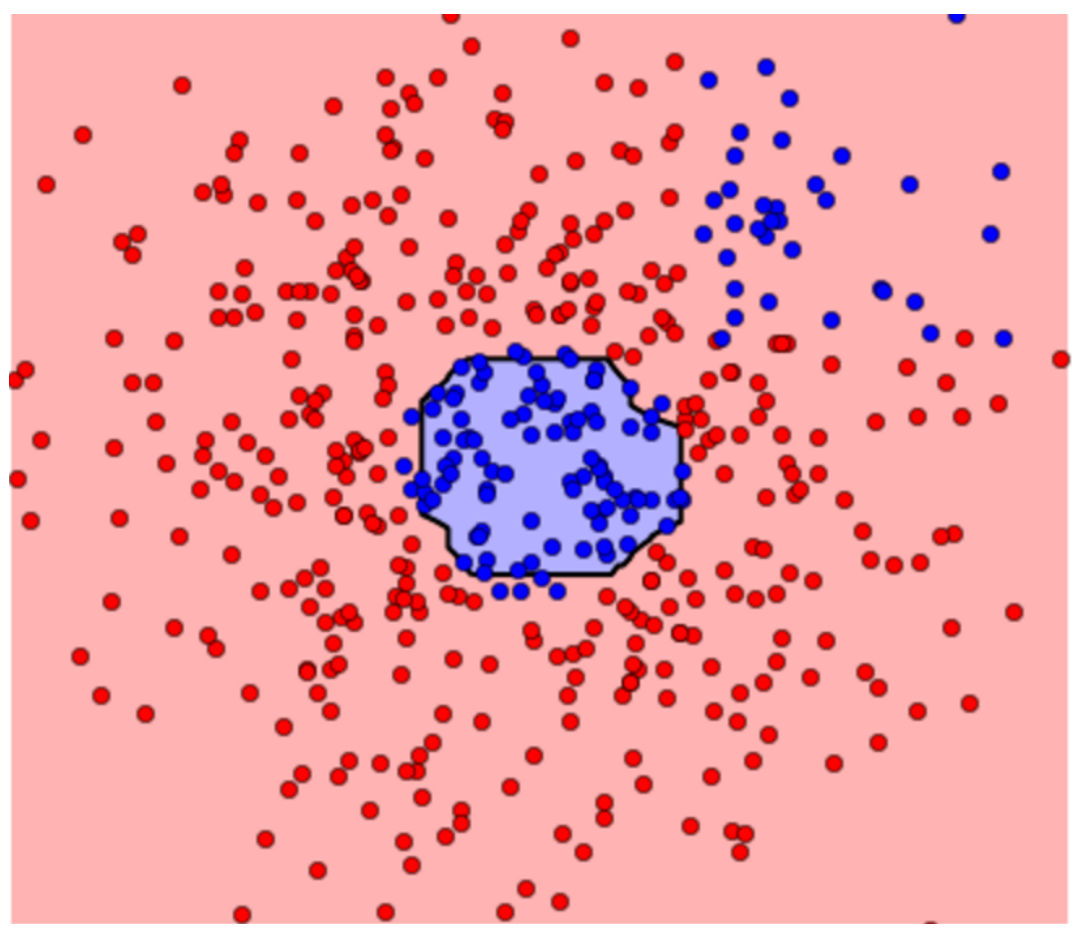

Неглубокие деревья не способны улавливать все закономерности в данных. В данном случае синий класс состоит из двух групп объектов, но неглубокое дерево смогло уловить только центральную группу. На объектах из второй группы такое дерево ошибается.

Вторая проблема со случайным лесом состоит в том, что процесс построения деревьев является ненаправленным: каждое следующее дерево в композиции никак не зависит от предыдущих. Из-за этого для решения сложных задач необходимо огромное количество деревьев.

### 1.2 Бустинг: основная идея

Решить данные проблемы можно с помощью так называемого бустинга. Бустинг — это подход к построению композиций, в рамках которого:

> Базовые алгоритмы строятся последовательно, один за другим.

> Каждый следующий алгоритм строится таким образом, чтобы исправлять ошибки уже построенной композиции.

Благодаря тому, что построение композиций в бустинге является направленным, достаточно использовать простые базовые алгоритмы, например неглубокие деревья.

### 1.3 Бустинг на примере задачи регрессии

Пусть дана задача регрессии, в которой в качестве ошибки используется среднеквадратичная ошибка:

$$
    MSE(a, X) = \frac{1}{l} \sum_{i = 1}^{l} ( a(x_i) - y_i )^2
$$

Для начала необходимо обучить первый простой алгоритм (например, неглубокое решающее дерево):

$$
    b_1(x) = \underset{b}{\mathrm{argmin}} \frac{1}{l} \sum_{i = 1}^{l} ( b(x_i) - y_i )^2
$$

Такая задача минимизации квадратичной ошибки легко решается, например, градиентным спуском. Этот алгоритм будет первым алгоритмом в строящейся композиции.

Второй алгоритм должен быть обучен таким образом, чтобы композиция первого и второго алгоритмов:
$$ b_1(x) + b_2(x)$$

имела наименьшую из возможных ошибку на обучающей выборке:
$$
    b_2(x) = \underset{b}{\mathrm{argmin}} \frac{1}{l} \sum_{i = 1}^{l} ( b_1(x_i) + b(x_i) - y_i )^2 = 
    \underset{b}{\mathrm{argmin}} \frac{1}{l} \sum_{i = 1}^{l} ( b(x_i) - (y_i - b_1(x_i)) )^2
$$

Другими словами, алгоритм $b_2(x)$ улучшает качество работы алгоритма $b_1(x)$. Продолжая по аналогии на $N$ шаге очередной алгоритм $b_N(x)$ будет определяться следующим образом:

$$
    b_N(x) = \underset{b}{\mathrm{argmin}} \frac{1}{l} \sum_{i = 1}^{l} \big( b(x_i) - ( y_i - \sum_{n = 1}^{N - 1} b_n(x_i) ) \big)^2
$$

Процесс продолжается до тех пор, пока ошибка композиции $b_1(x) + ... + b_N(x)$ не будет устраивать.

## 2. Градиентный бустинг

Градиентный бустинг является одним из лучших способов направленного построения композиции на сего- дняшний день. В градиентном бустинге строящаяся композиция

$$ a_N(x) = \sum_{n = 1}^{N} b_n(x)$$

является суммой, а не их усреднением базовых алгоритмов $b_i(x)$. Это связано с тем, что алгоритмы обучаются последовательно и каждый следующий корректирует ошибки предыдущих.

Пусть задана функция потерь $L(y, z)$, где $y$ - истинный ответ, $z$ - прогноз алгоритма на некотором объекте. Примерами возможных функций потерь являются:

> среднеквадратичная ошибка (в задаче регрессии): $L(y, z) = (y − z)^2$

> логистическая функция потерь (в задаче классификации): $L(y, z) = \log(1 + e^{−yz})$

### 2.1 Инициализация

В начале построения композиции по методу градиентного бустинга нужно ее инициализировать, то есть построить первый базовый алгоритм $b_0(x)$. Этот алгоритм не должен быть сколько-нибудь сложным и не стоит тратить на него много усилий. Например, можно использовать:

> алгоритм $b_0(x) = 0$, который всегда возвращает ноль (в задаче регрессии);

> более сложный $b_0(x) = \frac{1}{l} \sum_{i = 1}^{l} y_i$, который возвращает средний по всем элементам обучающей выборки истинный ответ (в задаче регрессии);

> алгоритм $b_0(x) = \underset{y \in Y}{\mathrm{argmax}} \sum_{i = 1}^{l} [y_i = y]$, который всегда возвращает метку самого распространенного класса в обучающей выборке (в задаче классификации).

### 2.2 Обучение базовых алгоритмов

Обучение базовых алгоритмов происходит последовательно. Пусть к некоторому моменту обучены $N − 1$ алгоритмов $b_1(x), ..., b_{N − 1}(x)$, то есть композиция имеет вид:

$$
    a_{N - 1} (x) = \sum_{n = 1}^{N - 1} b_n(x).
$$

Теперь к текущей композиции добавляется еще один алгоритм $b_N(x)$. Этот алгоритм обучается так, чтобы как можно сильнее уменьшить ошибку композиции на обучающей выборке:

$$
    \sum_{i = 1}^{l} L(y_i, a_{N - 1}(x_i) + b(x_i)) \to \underset{b}{\mathrm{min}}
$$

Сначала имеет смысл решить более простую задачу: определить, какие значения $s_1, ..., s_l$ должен принимать алгоритм $b_N(x_i) = s_i$ на объектах обучающей выборки, чтобы ошибка на обучающей выборке была минимальной:

$$
    F(s) = \sum_{i = 1}^{l} L(y_i, a_{N - 1}(x_i) + s_i) \to \underset{s}{\mathrm{min}}
$$

где $s = (s_1, ..., s_l)$ - **вектор сдвигов**.

Другими словами, необходимо найти такой вектор сдвигов $s$, который будет минимизировать функцию $F(s)$. Поскольку направление наискорейшего убывания функции задается направлением антиградиента, его можно принять в качестве вектора $s$:

$$
s = - \nabla F = (- L'_{z} (y_1, a_{N - 1} (x_1)), ..., - L'_{z} (y_l, a_{N - 1} (x_l)))^T
$$

Компоненты вектора сдвигов $s$, фактически, являются теми значениями, которые на объектах обучающей выборки должен принимать новый алгоритм $b_N(x)$, чтобы минимизировать ошибку строящейся композиции.

Обучение $b_N(x)$, таким образом, представляет собой задачу обучения на размеченных данных, в которой $\{(x_i, s_i)\}_{i = 1}^{l}$ - обучающая выборка, и используется, например, квадратичная функция ошибки:

$$
    b_N(x) = \underset{b}{\mathrm{argmin}} \frac{1}{l} \sum_{i = 1}^{l} ( b(x_i) - s_i )^2.
$$

Следует обратить особое внимание на то, что информация об исходной функции потерь $L(y, z)$, которая не обязательно является квадратичной, содержится в выражении для вектора оптимального сдвига $s$. Поэтому для большинства задач при обучении $b_N(x)$ можно использовать квадратичную функцию потерь.

## 3. Описание алгоритма градиентного бустинга

1. **Инициализация:** инициализация композиции $a_0(x) = b_0(x)$, то есть построение простого алгоритма $b_0$.

2. **Шаг итерации:**

    2.1 **Вычисляется вектор сдвига:** $s = - \nabla F = (- L'_{z} (y_1, a_{N - 1} (x_1)), ..., - L'_{z} (y_l, a_{N - 1} (x_l)))^T$
    
    2.2 **Строится алгоритм:** $b_N(x) = \underset{b}{\mathrm{argmin}} \frac{1}{l} \sum_{i = 1}^{l} ( b(x_i) - s_i )^2$, параметры которого подбираются таким образом, что его значения на элементах обучающей выборки были как можно ближе к вычисленному вектору оптимального сдвига s.
    
    2.3 **Алгоритм $b_n(x)$ добавляется в композицию:** $a_n(x) = \sum_{m = 1}^{n} b_m(x)$
    
3. Если не выполнен критерий останова (об этом будет рассказано далее), то выполнить еще один шаг итерации. Если критерий останова выполнен, остановить итерационный процесс.

## 4. Проблема переобучения градиентного бустинга

### 4.1. Проблема переобучения градиентного бустинга

На следующем графике изображена зависимость ошибки градиентного бустинга от числа используемых деревьев на обучающей и контрольной выборках.

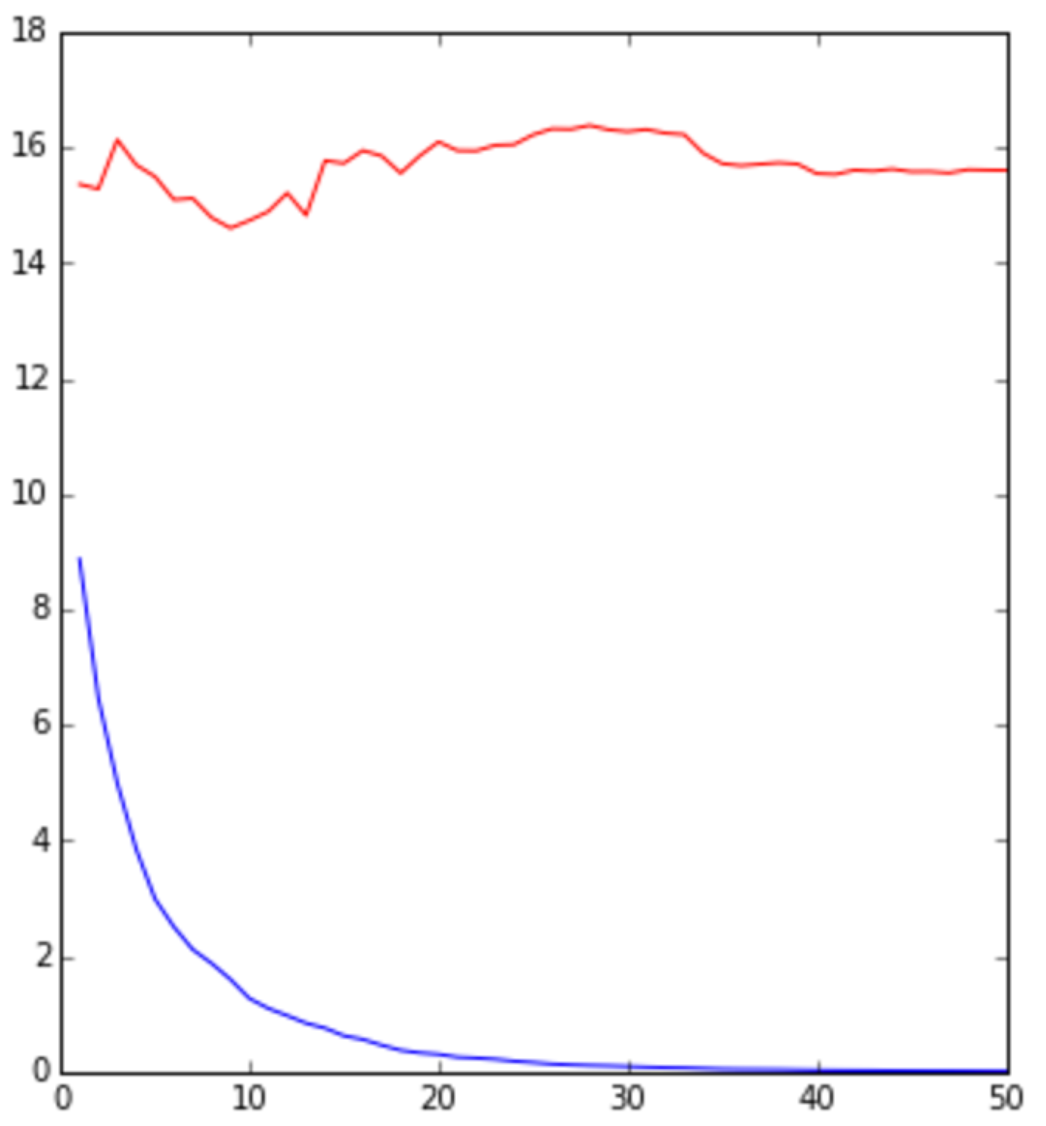

Ошибка в зависимости от числа деревьев: синяя линия — ошибка на обучающей выборке. Красная линия — ошибка на контрольной выборке.

По мере увеличения числа деревьев ошибка на обучающей выборке постепенно уходит в 0. Ошибка на контрольной выборке существенно больше ошибки на обучающей выборке, достигает минимума примерно на 10 итерации, а затем начинает опять возрастать. Имеет место переобучение.

Это связано с тем, что базовый алгоритм пытается приблизить вектор антиградиента на обучающей выборке. Но в градиентном бустинге используются очень простые базовые алгоритмы, например невысокие решающие деревья, которые не могут хорошо аппроксимировать вектор антиградиента на обучающей выборке. Вектор, построенный алгоритмом, будет указывать не в сторону наискорейшего убывания ошибки, то есть вместо градиентного спуска можно получить случайное блуждание. Из-за этого и получается не очень хорошее качество на контроле.

### 4.2. Сокращение размера шага

Чтобы решить эту проблему, нужно «не доверять» направлению, которое построил базовый алгоритм и лишь чуть-чуть смещаться в сторону этого вектора:

$$
    a_N(x) = a_{N − 1}(x) + \eta b_N(x),
$$

где $\eta \in (0, 1]$ — **длина шага.** Это обеспечивает очень аккуратное движение в пространстве, что делает возможным нахождение локального минимума.

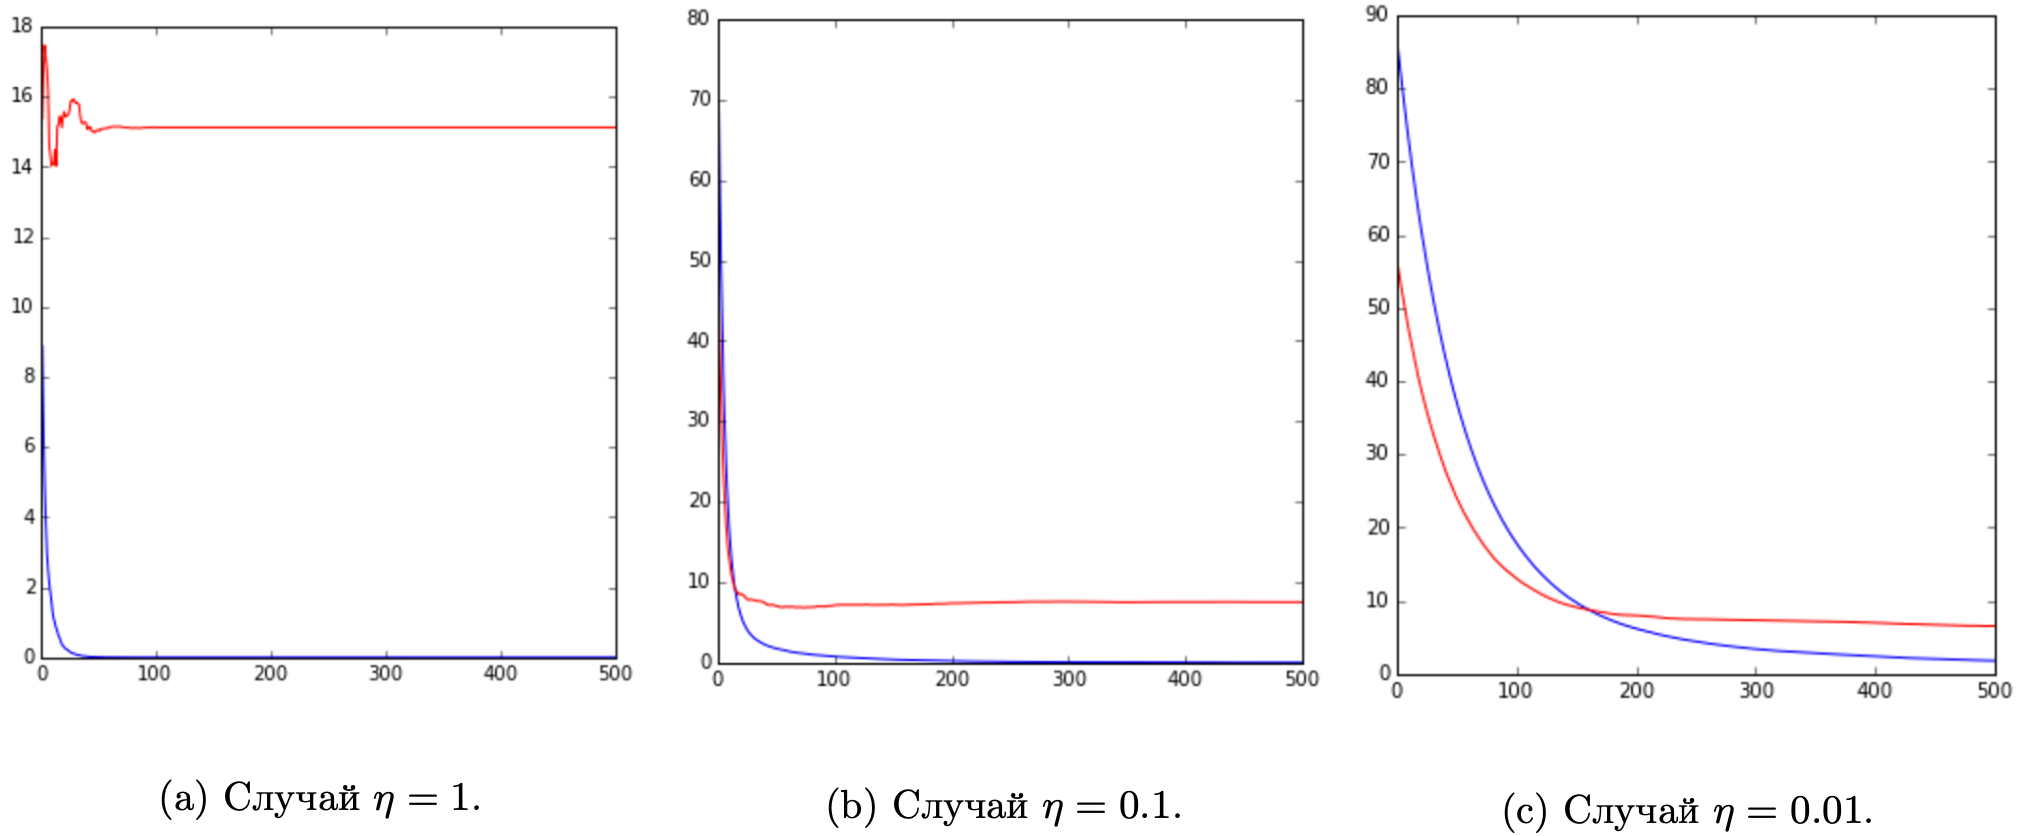


*Качество градиентного бустинга на обучающей выборке и контроле при различных $\eta$.*

Как видно по графикам, при $\eta = 0.1$ качество на контрольной выборке уже существенно лучше, то есть в некотором смысле удалось побороть переобучение. При еще меньшей длине шага $\eta = 0.01$ градиентному бустингу требуется существенно больше итераций, чтобы достичь чуть-чуть большего качества. Таким образом:

- Чем меньше размер шага, тем больше нужно базовых алгоритмов, чтобы достичь хорошего качества, и тем больше времени занимает процесс.

- Чем меньше размер шага, тем лучшего качества можно достичь.

Другими словами, приходится выбирать: или быстро получить достаточно хорошее качество, или получить качество чуть-чуть лучше за большее время.

### 4.3. Подбор гиперпараметров

Размер шага $\eta$ также является гиперпараметром градиентного бустинга, как и число итерации $N$. Эти гиперпараметры следует подбирать либо по отложенной выборке, либо по по кросс-валидации. Но подбирать сразу два гиперпараметра довольно сложно, поэтому обычно используют одну из двух следующих стратегий:

1. Зафиксировать размер шага $η$ и подбирать число итераций $N$

2. Зафиксировать число итераций $N$ и подбирать размер шага $η$

Обе стратегии неплохо работают, но если время и ресурсы не ограничены, можно попробовать подобрать оба параметра одновременно.

### 4.4. Стохастический градиентный бустинг

**Бэггинг** — еще один подход к борьбе с переобучением градиентного бустинга, который заключается в том, что каждый базовый алгоритм обучается не на всей выборке, а на некоторой ее случайной подвыборке. Такой подход еще называется **стохастическим градиентным бустингом.**

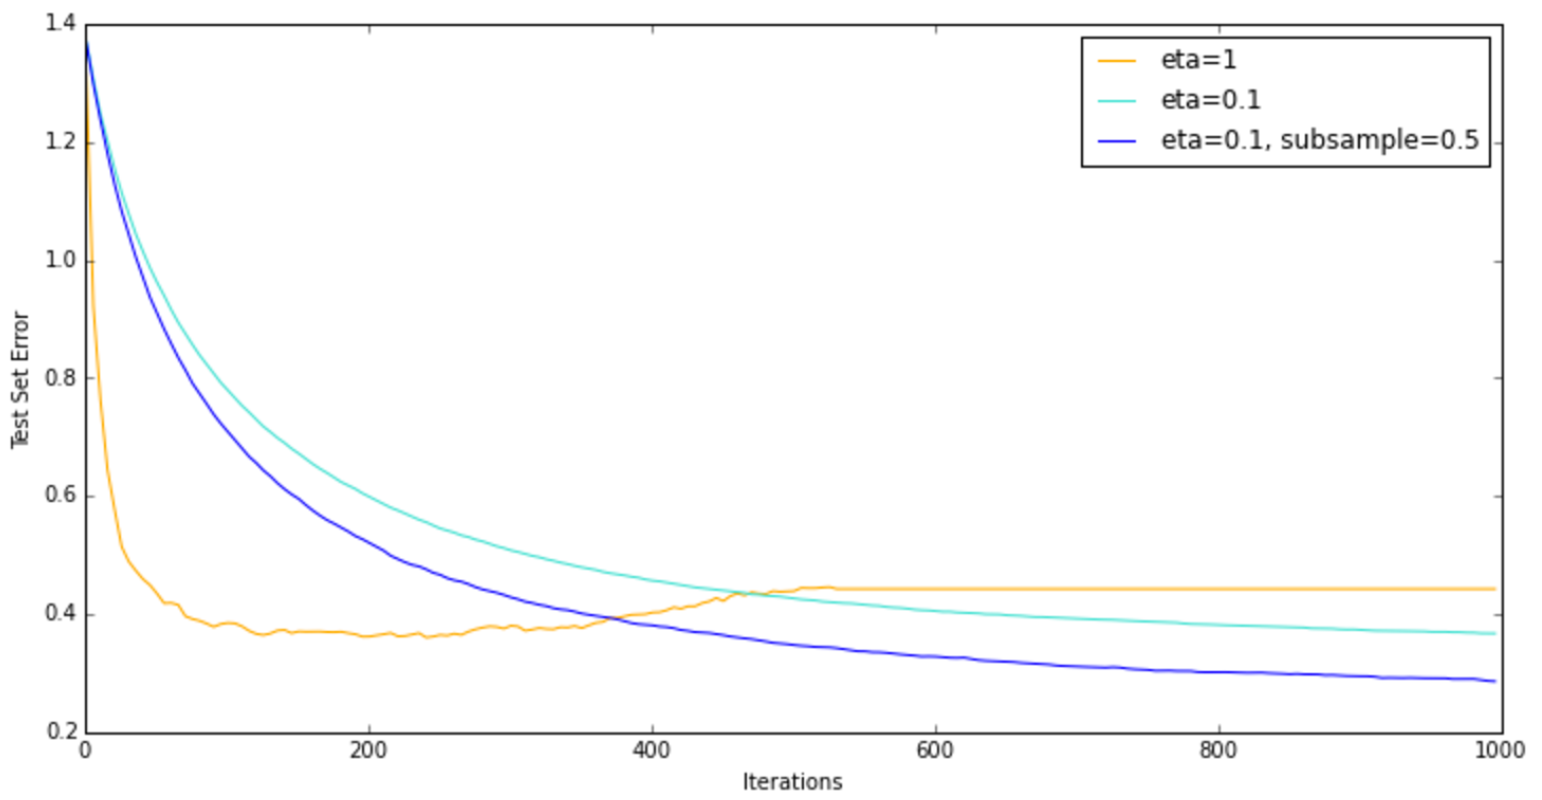

*Качество на контрольной выборке в зависимости от числа деревьев.*

На графике изображены зависимость качества на контроле от числа деревьев:

> Оранжевая кривая: без применения сокращения шага и без бэггинга. Кривая обладает явно выра-
женным минимумом, после чего алгоритм начинает переобучаться.

> Бирюзовая кривая: при использовании сокращения шага с параметром $\eta = 0.1$ без бэггинга. В этом
случае требуется больше итерации, чтобы достичь хорошего качества, но и при этом достигается более
низкое значение ошибки. То есть метод сокращения шага действительно работает.

> Синяя кривая: при использовании сокращения шага с параметром $\eta = 0.1$ и бэггинга с размером подвыборки равным половине обучающей выборки. Форма кривой совпадает с формой бирюзовой кривой, но при этом за такое же количество итераций алгоритм достигает более низкой ошибки.

То есть использование стохастического градиентного бустинга позволяет уменьшить ошибку или достичь такой же ошибки при таком же числе итераций.

## 5. Градиентный бустинг для регрессии и классификации

### 5.1. Градиентный бустинг

В градиентном бустинге в качестве базовых алгоритмов, как правило, используются не очень глубокие (глубина выбирается от 2 до 8, обычно ближе к 2) решающие деревья. Использования таких не очень глубоких деревьев все же достаточно, чтобы восстанавливать сложные закономерности, поскольку бустинг строит направленную композицию. Чтобы решить возникающую в градиентном бустинге проблему с переобучением, необходимо использовать оба подхода борьбы с ним: сокращение шага и бэггинг.

### 5.2. Градиентный бустинг для регрессии

Типичный функционал ошибки в регрессии — это среднеквадратичная ошибка:
$$
    MSE(a, X) = \frac{1}{l} \sum_{i = 1}^{l} ( a(x_i) - y_i )^2
$$

При этом функция потерь, которая измеряет ошибку для одного объекта:
$$ L(y, z) = (z - y)^2, \ \ \  L'_z (y, z) = 2 (z - y)$$

где $z$ — это прогноз нашего алгоритма, а $y$ — истинный ответ на данном объекте. Соответственно, вектор сдвигов, каждая компонента которого показывает, как нужно модифицировать ответ на каждом объекте обучающей выборки, чтобы уменьшить среднеквадратичную ошибку, имеет вид:

$$ s = \big( −2(a_{N - 1}(x_1) - y_1), ..., −2(a_{N - 1}(x_l) - y_l) \big)^T $$

### 5.3. Градиентный бустинг для классификации

В задаче бинарной классификации ($Y = \{−1, +1\}$) популярным выбором для функции потерь является логистическая функция потерь:

$$ \sum_{i = 1}^{n} \log (1 + e^{- y_i a(x_i)}), $$

где $a(x) \in R$ - оценка принадлежности положительному классу. Если $a(x) > 0$, классификатор относит объект $x$ к классу $+1$, а при $a(x) ≤ 0$ – к классу $−1$. Причем, чем больше $|a(x)|$, тем больше классификатор уверен в своем выборе. Функция потерь в этом случае записывается следующим образом:

$$ L(y, z) = \log(1 + e^{-yz}), \ \ \ \ \ L'_z(y, z) = - \frac{y}{1 + e^{yz}}$$

Вектор сдвигов s в этом случае будет иметь вид:

$$ s = \big( \frac{y_1}{1 + e^{y_1 a_{N - 1}(x_1)}}, ..., \frac{y_l}{1 + e^{y_l a_{N - 1}(x_l)}} \big) .$$

Новый базовый алгоритм будет настраиваться таким образом, чтобы вектор его ответов на объектах обучающей выборки был как можно ближе к $s$. После того, как вычислен алгоритм $a_N(x)$, можно оценить вероятности принадлежности объекта $x$ к каждому из классов:

$$ p(y = 1 | x) = \frac{1}{1 + e^{- a_N(x)}}, \ \ \ \ \ p(y = -1 | x) = \frac{1}{1 + e^{a_N(x)}}$$

## 6. Градиентный бустинг для решающих деревьев

В этом разделе речь пойдет о том, как применять градиентный бустинг, если базовый алгоритм — это решающие деревья.

### 6.1. Поверхности, которые восстанавливают решающие деревья

В задаче классификации с тремя классами решающее дерево может разделить выборку примерно вот так:

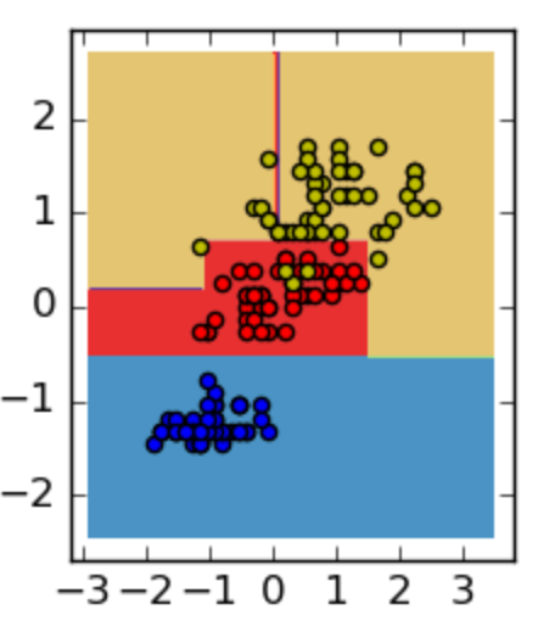

Поскольку условия в каждой вершине дерева есть сравнение значения какого-то признака с порогом, решающее дерево выделяет каждый класс с помощью некой области, стороны которой параллельны осям координат.

В задаче регрессии функция, которую восстанавливает решающее дерево — кусочно постоянная:

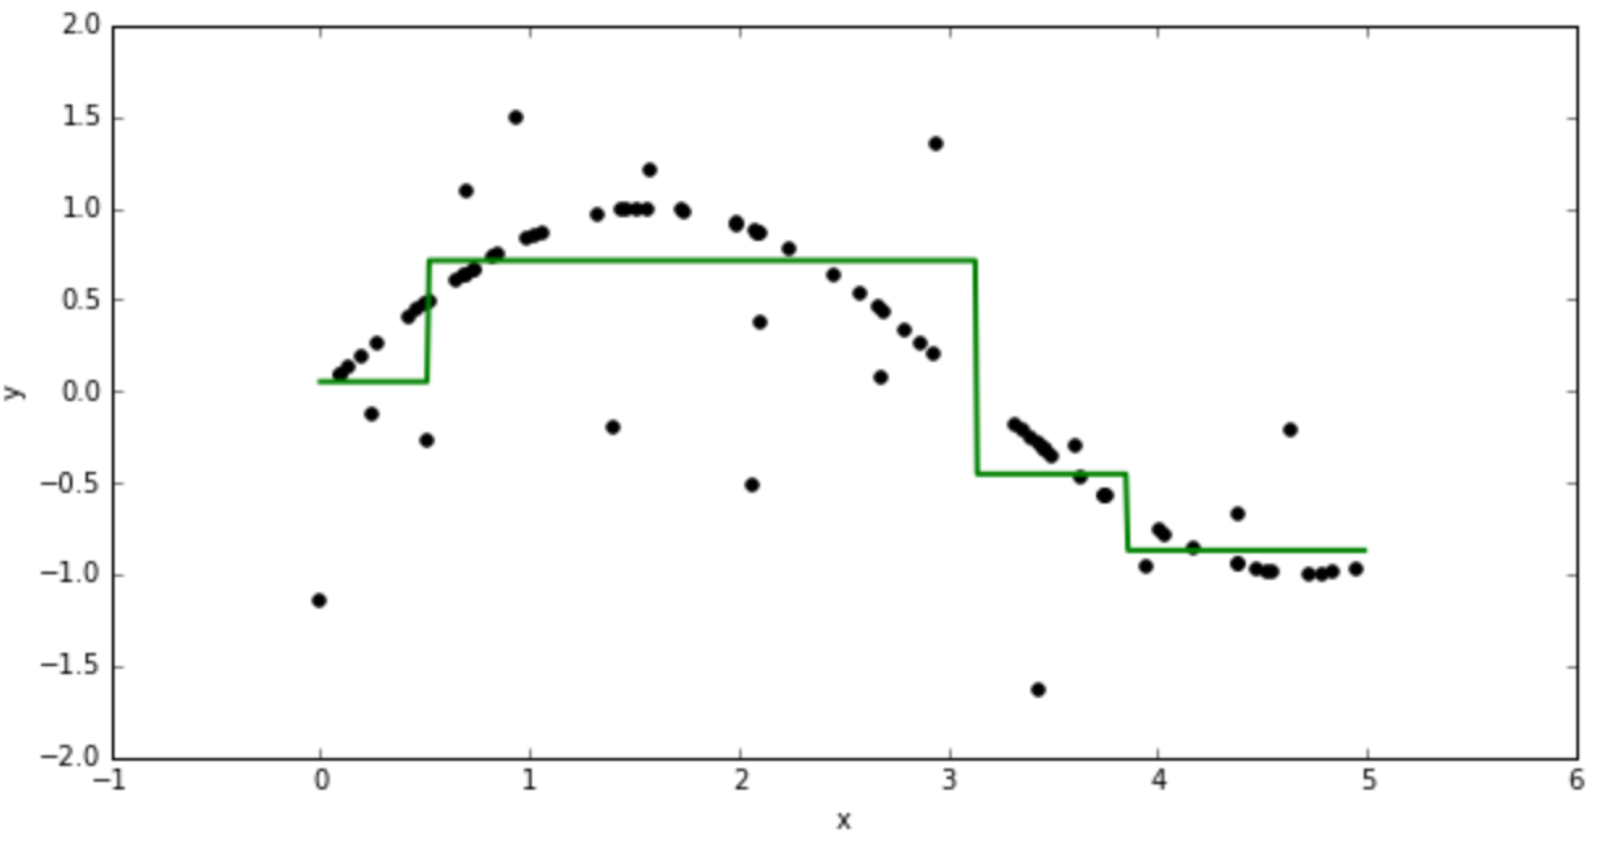

В данном случае есть четыре участка, на каждом из которых функция возвращает постоянное значение.

Решающее дерево, таким образом, разбивает все пространство объектов на J областей: $R_1, ..., R_j$ в каждой из которых дерево возвращает постоянное предсказание. Пусть $b_j$ - предсказание дерева в области $R_j$, тогда решающее дерево $b(x)$ можно записать в следующем виде:

$$
    b(x) = \sum_{j = 1}^{J} [x \in R_j] b_j.
$$

Здесь $[x \in R_j]$ - индикатор того, что объект $x$ попал в область $R_j$.

### 6.2. Градиентный бустинг для решающих деревьев

В градиентном бустинге каждый новый базовый алгоритм $b_N$ прибавляется к уже построенной композиции:

$$ a_N(x) = a_{N −1}(x) + b_N(x).$$

Если базовые алгоритмы — это решающие деревья

$$b_N(x) = \sum_{j = 1}^{J} [x \in R_{Nj}] b_{Nj},$$

тогда новая композиция $a_N$ будет выглядеть следующим образом:

$$a_N(x) = a_{N - 1}(x) + \sum_{j = 1}^{J} [x \in R_{Nj}] b_{Nj}.$$

Последнее выражение можно проинтерпретировать не только как прибавление одного решающего дерева, но и как прибавление $J$ очень простых алгоритмов, каждый из которых возвращает постоянное значение в некоторой области и ноль во всем остальном пространстве. Можно подобрать каждый прогноз $b_{Nj}$, где $N$ — номер дерева, $j$ — номер листа в этом дереве, таким образом, чтобы он был оптимальным с точки зрения исходной функции потерь:

$$ \sum_{i = 1}^{l} L \big( y_i, a_{N - 1}(x) + \sum_{j = 1}^{J} [x \in R_{Nj}] b_{Nj} \big) \to \min_{b_1, ..., b_j}$$

Можно показать, что данная задача распадается на $J$ подзадач:

$$ b_{Nj} = \underset{\gamma \in R}{\mathrm{argmin}} \sum_{x_i \in R_j} L(y_i, a_{N - 1}(x) + \gamma) .$$

Такая задача часто решается аналитически или любым простым методом.

Итак, структура базового решающего дерева (структура областей $R_j$) в градиентном бустинге настраивается минимизацией среднеквадратичной ошибки. Потом можно переподобрать ответы в листьях, то есть перенастроить их, так, чтобы они были оптимальны не с точки зрения среднеквадратичной ошибки (с помощью которой строилось дерево), а с точки зрения исходной функции потерь $L$. Это позволяет существенно увеличить скорость сходимости градиентного бустинга.